# Assignment #1: low level DIP practice

**Name**: Hafidz Ubaidillah<br>
**Asia University ID**: 109712286<br>
**Original University**: Universitas Muhammadiyah Gresik (UMG)

## Apply the Types of filter as follows:
- Gaussian blur
- Median filter
- Dilation and erosion
- Customs filters
- Image thresholding

the pictures that I use are as follows:
- [elang jawa](https://drive.google.com/uc?export=view&id=1aSry_B9yGsLE-2FW2fRE1Ckg0zuftDHQ)
- [cendrawasih](https://drive.google.com/uc?export=view&id=1u9ssYnsJoucDbf6b3_JmI1lEVgW04AUs)
- [paper](https://drive.google.com/uc?export=view&id=16UrO3RbqErs1qx4r4tHCmf9RVP91r-3W)

(click to show the image)

First step, I import all modules in the beginning.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageEnhance
from skimage import io, data, filters, color, segmentation
from skimage.morphology import disk, dilation, erosion
from skimage.util import random_noise, img_as_ubyte
import numpy as np

I prepare some variables

In [2]:
elangjawa_pil = Image.open('elang_jawa.jpg')
elangjawa_ski = io.imread('elang_jawa.jpg')

cendrawasih_pil = Image.open('cendrawasih.jpg')
cendrawasih_ski = io.imread('cendrawasih.jpg')

paper_pil = Image.open('paper.jpg')
paper_ski = io.imread('paper.jpg')

A function for displaying images before and after processing

In [15]:
def show_comparison(original, filtered, filtername, figsize=(20, 17)):
    fig, ax = plt.subplots(figsize=figsize, ncols=2)
    ax[0].imshow(original, cmap=plt.cm.gray)
    ax[0].set_title('original')
    ax[1].imshow(filtered, cmap=plt.cm.gray)
    ax[1].set_title(filtername)

## 1. Gaussian Blur

<ipython-input-16-afce29a9a0aa>:1: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  ski_elangjawa_gau = filters.gaussian(elangjawa_ski, sigma=4)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


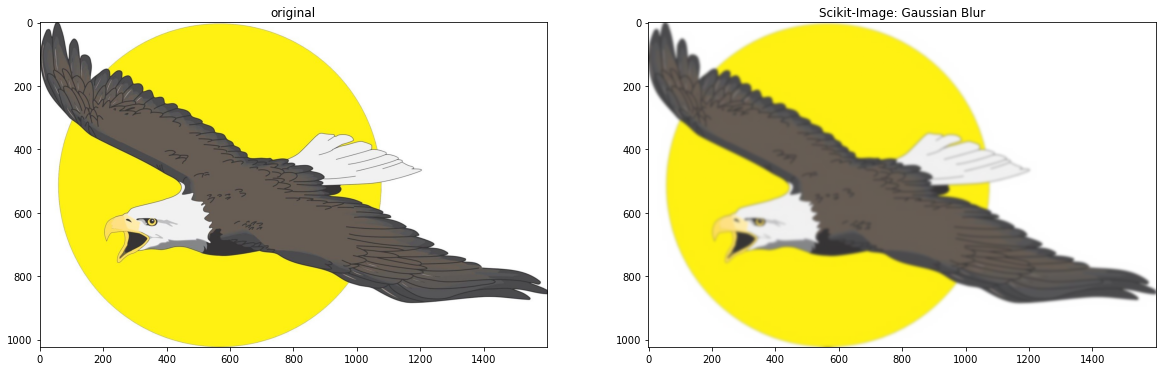

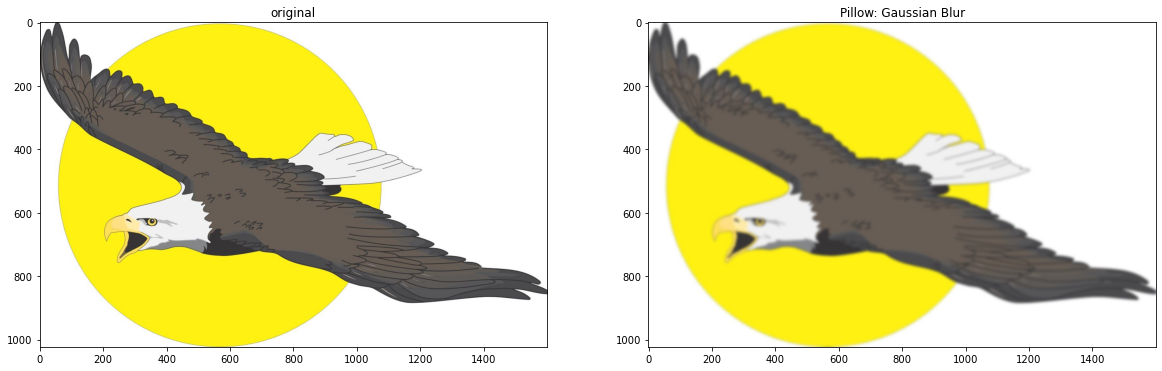

In [16]:
ski_elangjawa_gau = filters.gaussian(elangjawa_ski, sigma=4)
show_comparison(elangjawa_ski, ski_elangjawa_gau, 'Scikit-Image: Gaussian Blur')

pil_elangjawa_gau = elangjawa_pil.filter(ImageFilter.GaussianBlur(4))
show_comparison(elangjawa_pil, pil_elangjawa_gau, 'Pillow: Gaussian Blur')

## 2. Median Filter

check: (1269, 2048)


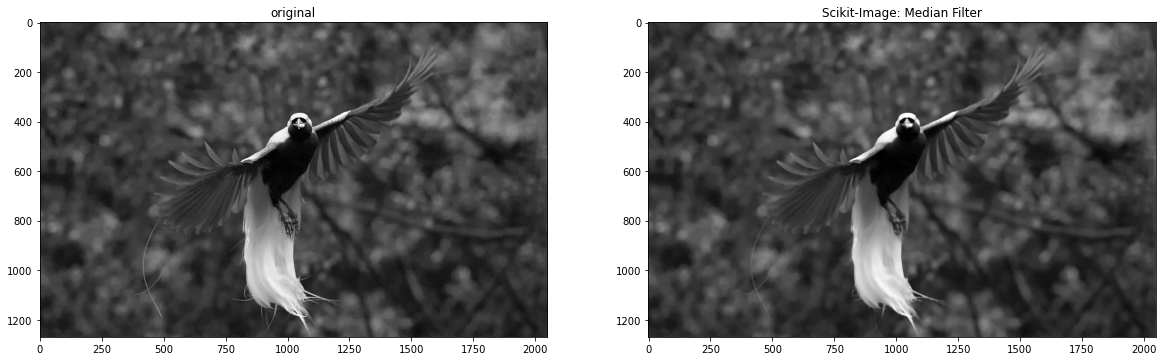

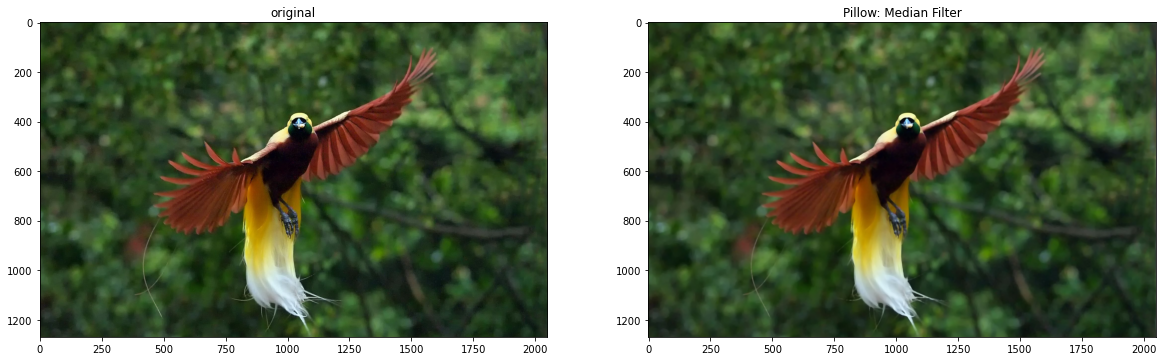

In [20]:
gray_cendrawasih = color.rgb2gray(cendrawasih_ski)

ski_cendrawasih_median = filters.rank.median(gray_cendrawasih,
                                             disk(5))
show_comparison(gray_cendrawasih,
                ski_cendrawasih_median,
                'Scikit-Image: Median Filter')

pil_cendrawasih_median = cendrawasih_pil.filter(ImageFilter.MedianFilter(7))
show_comparison(cendrawasih_pil,
                pil_cendrawasih_median,
                'Pillow: Median Filter')

## 3. Dilation and Erosion

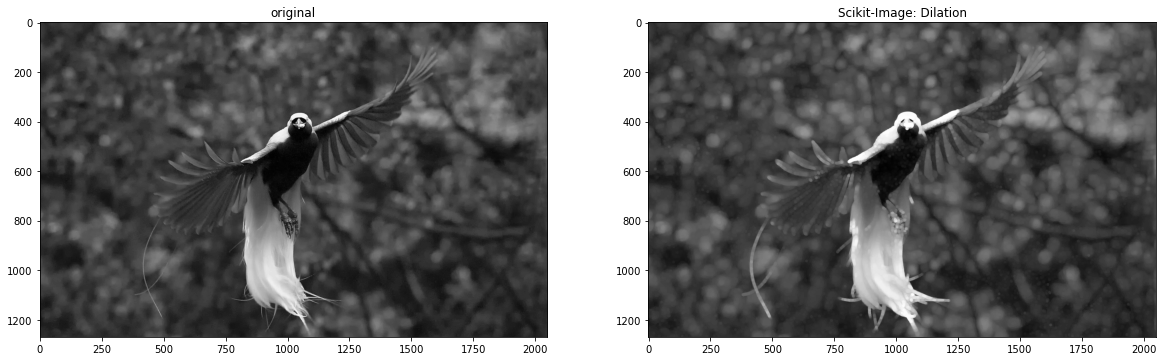

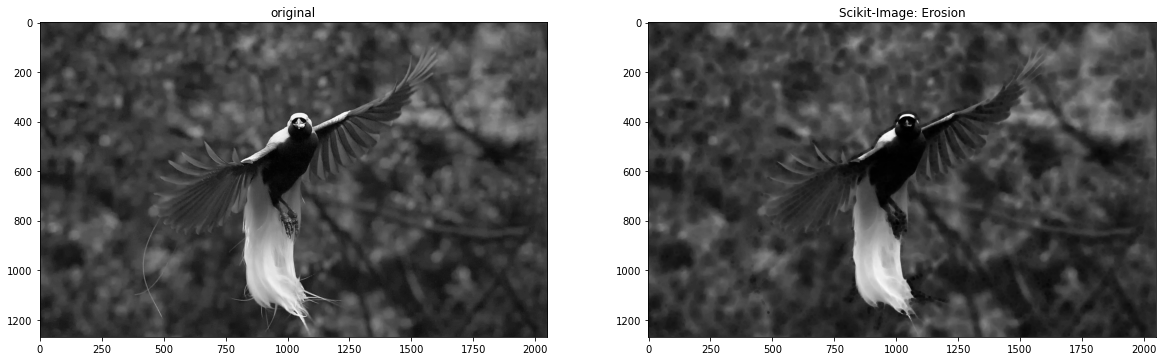

In [23]:
dilated_ski = dilation(gray_cendrawasih,
                       disk(5))
show_comparison(gray_cendrawasih,
                dilated_ski,
                'Scikit-Image: Dilation')

eroded_ski = erosion(gray_cendrawasih
                     , disk(5))
show_comparison(gray_cendrawasih, eroded_ski,
                'Scikit-Image: Erosion')

## 4. Custom Filters

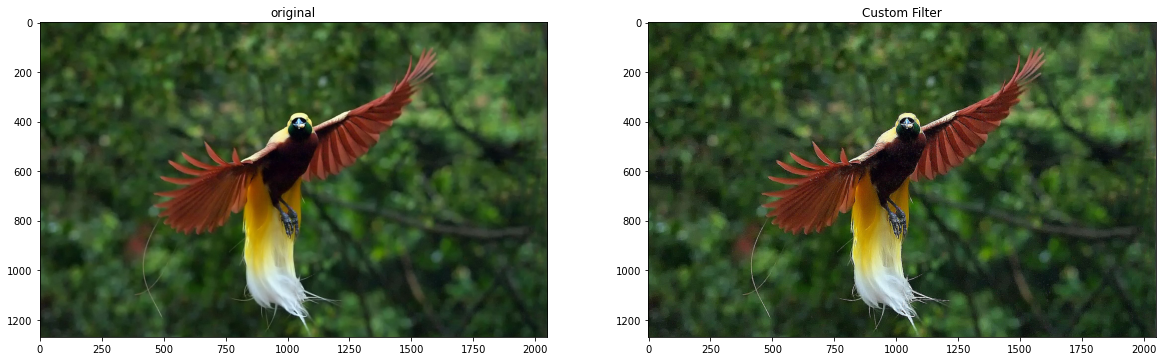

In [28]:
custom_pil = cendrawasih_pil.filter(ImageFilter.Kernel((3, 3), [-1, -1, -1, -1, 9, -1, -1, -1, -1]))
show_comparison(cendrawasih_pil, custom_pil, 'Custom Filter')


# fig5 = plt.figure(figsize=(20, 19))

# fig5.add_subplot(2, 3, 1)
# plt.title('Before')
# plt.imshow(img_pil)

# # using pillow
# pil_cus1 = img_pil.filter(ImageFilter.Kernel((3, 3), [0, -1, 0, 
#                                                       -1, 5, -1, 
#                                                       0, -1, 0]))
# fig5.add_subplot(2, 3, 3)
# plt.title('After: custom filter using pillow')
# plt.imshow(pil_cus1)

## 5. Image Thresholding

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


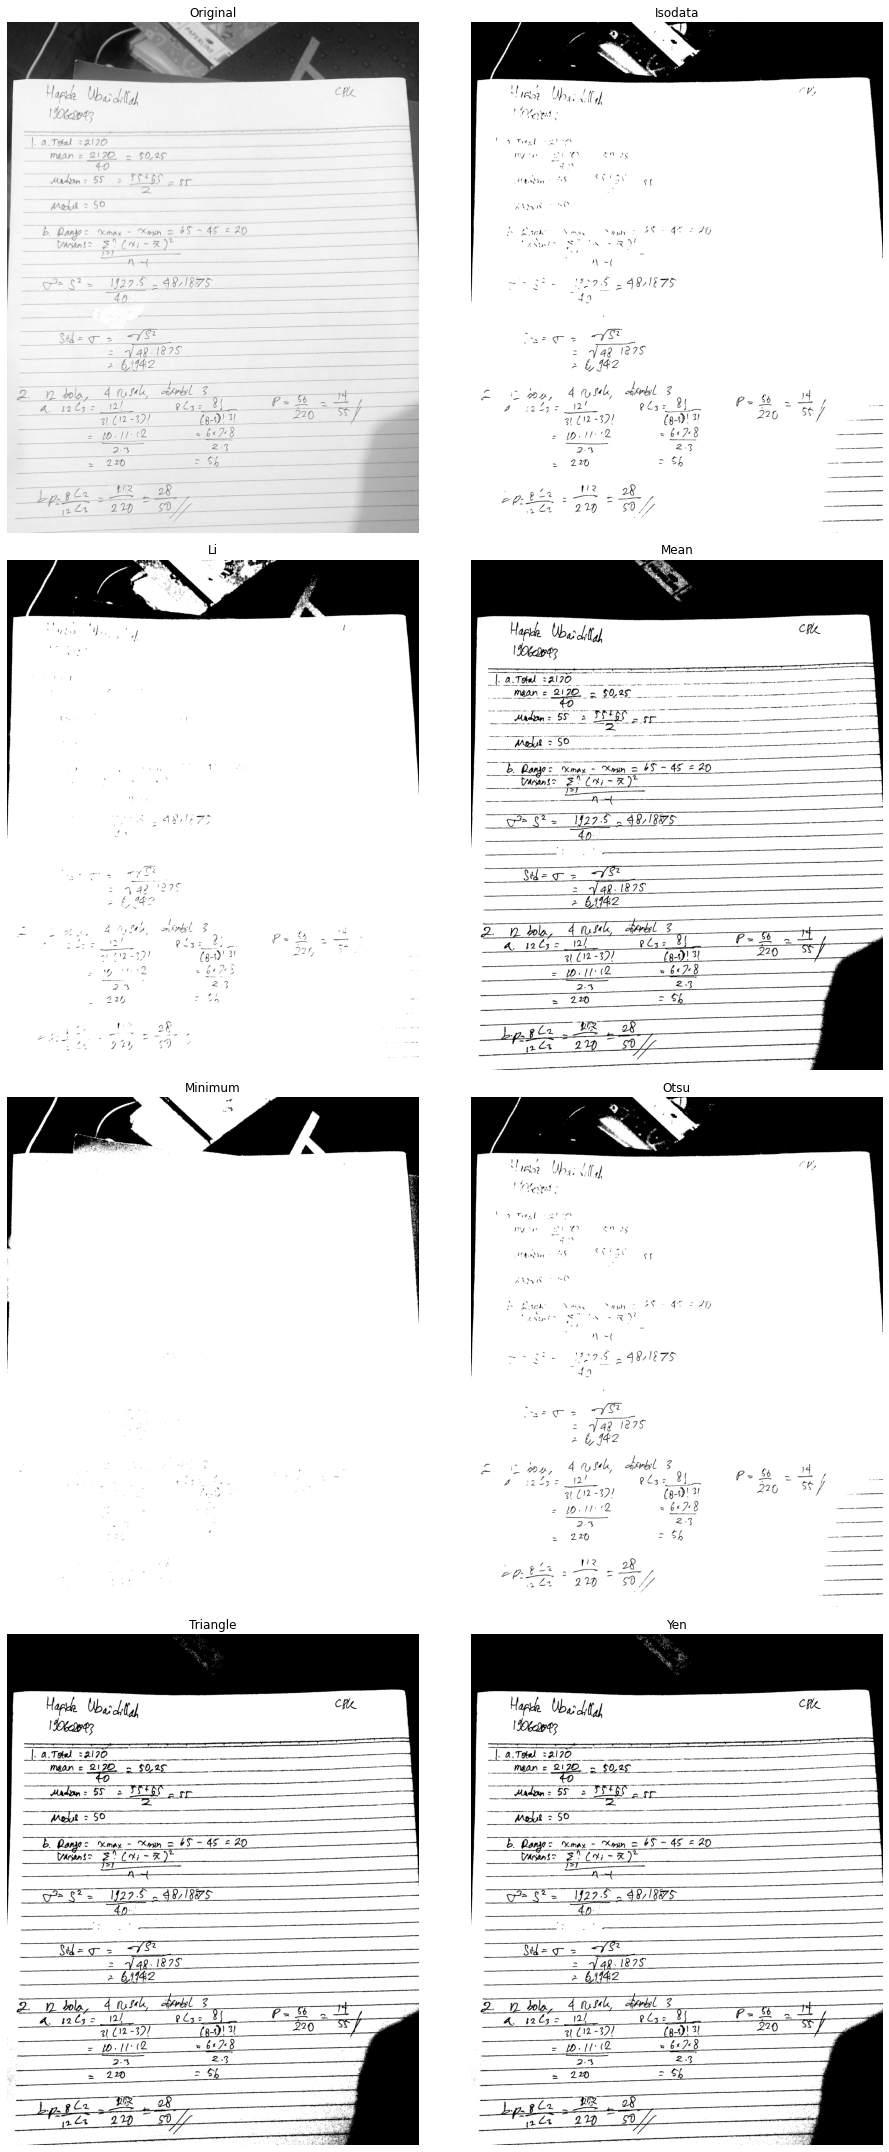

In [30]:
gray_paper = color.rgb2gray(paper_ski)

fig, ax = filters.try_all_threshold(gray_paper, figsize=(14, 30))
plt.show()